### Importar librerías necesarias

In [252]:
# Librería para manipulación y análisis de datos en estructuras tabulares (DataFrames y Series)
import pandas as pd

# -------------------------------------------
# Módulos de Scikit-learn (sklearn)
# -------------------------------------------

# Permite construir pipelines que encadenan múltiples transformaciones y modelos
from sklearn.pipeline import Pipeline

# Imputación de valores faltantes en datos numéricos o categóricos
from sklearn.impute import SimpleImputer

# Normalización y transformación de variables:
# - StandardScaler: Escalado de variables numéricas a media 0 y desviación estándar 1
# - OneHotEncoder: Codificación one-hot para variables categóricas
# - LabelEncoder: Codificación de etiquetas en variables categóricas
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

# Permite seleccionar columnas de un DataFrame basado en su tipo (numéricas o categóricas)
from sklearn.compose import make_column_selector as selector

# Permite aplicar diferentes transformaciones a distintas columnas dentro de un solo pipeline
from sklearn.compose import ColumnTransformer

# División de datos en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# Modelos de aprendizaje automático:
# - RandomForestClassifier: Clasificación mediante bosques aleatorios
# - GradientBoostingClassifier: Clasificación mediante boosting de gradientes
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Modelos de regresión:
# - LogisticRegression: Modelo de regresión logística
from sklearn.linear_model import LogisticRegression

# Árbol de decisión para clasificación
from sklearn.tree import DecisionTreeClassifier

# Métricas de evaluación para modelos de clasificación
from sklearn.metrics import (
    roc_auc_score,          # AUC-ROC (Área bajo la curva ROC)
    classification_report,  # Reporte con precisión, recall y F1-score
    roc_curve,              # Curva ROC
    precision_score,        # Precisión de la clasificación
    recall_score,           # Recall (sensibilidad)
    f1_score                # F1-score (balance entre precisión y recall)
)

# Pruebas estadísticas:
# - ks_2samp: Prueba de Kolmogorov-Smirnov para comparar distribuciones
# - stats: Módulo de funciones estadísticas avanzadas
from scipy.stats import ks_2samp, stats

# -------------------------------------------
# Visualización de datos
# -------------------------------------------

# Librería para generar gráficos
import matplotlib.pyplot as plt

# Librería de manejo de arreglos numéricos y matrices
import numpy as np

# -------------------------------------------
# Creación de Transformadores Personalizados
# -------------------------------------------

# BaseEstimator, TransformerMixin: Permiten crear transformadores personalizados en sklearn
from sklearn.base import BaseEstimator, TransformerMixin

# Validación cruzada para evaluar modelos de manera más robusta
from sklearn.model_selection import cross_val_score

# -------------------------------------------
# Estadística y modelos econométricos
# -------------------------------------------

# Módulo de Scipy para estadísticas avanzadas (correcciones en imports)
from scipy import stats

# Módulo de Statsmodels para regresiones y análisis estadístico
import statsmodels.api as sm

# -------------------------------------------
# Manejo de Errores y Excepciones
# -------------------------------------------

# Ignorar advertencias en ejecución de código
import warnings

# -------------------------------------------
# Manejo de archivos y sistema operativo
# -------------------------------------------

# Modificar variables de entorno, manejar rutas y ejecutar scripts
import sys
import os


#### ignarar advertencias

In [2]:
# ignarar warinigs 
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

### Data procesada

In [60]:
# Ruta del dataset
file_path = r"C:\Users\mfsierra\OneDrive - fincomun.com.mx\Escritorio\Bimbo RS\Modelos ML\XGB Nuevos T-Conecta\DataEntrenamientoNuevos_3.csv"

# Vargar data set
data = pd.read_csv(file_path, encoding='latin1')

# mostrar
data.head()

,'Nombre del cliente,Solicitud,No_Cliente,No_Credito,BimboId,BimboId_2,blmId,Fecha Desembolso,Edad,Sexo,...,Max_Atraso_8_Semanas,Max_Atraso_4_Semanas,MaloMax16,MaloMax12,MaloMax8,MaloMax4,objetivo,Gradient Boosting_Proba,Max_Atraso_52_Semanas,Atraso52
0,LETICIA MARQUEZ VERDUGO,46892596,84274,1297661,632073,632073,771069454,27/04/2024,50,FEMENINO,...,0,0,0,0,0,0,0,0.401115,0,0
1,OSCAR NORBERTO MARTINEZ ALVAREZ,46953358,84174,1295241,9564065,GB9564065,876935903,27/04/2024,32,MASCULINO,...,0,0,0,0,0,0,0,0.401115,0,0
2,MARIA FERNANDA SANCHEZ GARCIA,46892513,84269,1297552,206006935,206006935,771307718,27/04/2024,29,FEMENINO,...,14,0,1,1,1,0,1,0.184716,21,7
3,INDIRA HERNANDEZ ANTONIO,46985985,84270,1297585,5634180,5634180,876949263,27/04/2024,37,FEMENINO,...,0,0,1,1,0,0,1,0.401115,21,0
4,MIRIAM MIÑON PEREZ,46892580,84271,1297607,167040,167040,87010478,27/04/2024,45,FEMENINO,...,0,0,1,0,0,0,1,0.401115,133,28


### Seleccion de columnas

In [61]:
# Eliminar duplicados (por si acaso)
data = data.drop_duplicates(subset='BimboId_2').reset_index(drop=True)

In [62]:
data.columns

Index([''Nombre del cliente', 'Solicitud', 'No_Cliente', 'No_Credito',
       'BimboId', 'BimboId_2', 'blmId', 'Fecha Desembolso', 'Edad', 'Sexo',
       'CP', 'Municipio', 'Entidad Federativa', 'Monto Desembolsado',
       'Tasa_Interes Anual', 'Dias de atraso', 'Tipo de Credito', 'Frecuencia',
       'Plazo', 'Decil_ventas', 'Decil_riesgos', 'Region_Geografica',
       'tipoCliente', 'dispositivo', 'Week', 'Giro_de_Cliente',
       'ventaPromedioSemanalUlt12Semanas', 'CreditosActivos', 'Adeudo',
       'VisitasRecibidasCobro', 'Porcentaje Pagado', 'DiasConCreditoVigente',
       'NoCreditosUlt12Meses', 'MontoPromedioXCredito', 'MontoMaxCredito',
       'MontoMinCredito', 'PromedioVisitasXMesBimbo',
       'PromedioVisitasXMesBarcel', 'VentaPromedioSemanalBarcel', 'VIVIENDAS',
       'Nivel_Socioeconómico', 'Estrato_sociecon', 'Hogar', 'Jefe_Hogar_sexo',
       'Jefe_edu', 'Ingreso_corriente', 'Gasto', 'Saldo_Actual',
       'Saldo_Vencido', 'Saldo_Actual_Promedio', 'Saldo_Vencido_Pro

In [63]:
# Variable objetivo definición
data['MaloMax52'] = data['Max_Atraso_52_Semanas'].apply(lambda x: 1 if x >= 30 else 0)
data['Malo52'] = data['Max_Atraso_52_Semanas'].apply(lambda x: 1 if x >= 30 else 0)

In [64]:
# Eliminar columnas innecesarias
columnas = ['atraso16', 'atraso12',
       'atraso8', 'atraso4', 'Malo12', 
       'Malo8', 'Malo4', 'Region_Geografica',
       'Max_Atraso_12_Semanas','Monto Desembolsado','Tasa_Interes Anual',
       'Max_Atraso_8_Semanas', 'Max_Atraso_4_Semanas',
        'MaloMax12', 'MaloMax8', 'MaloMax4', 'objetivo',
        "'Nombre del cliente", 'BimboId','Max_Atraso_16_Semanas',#'BimboId_2'
         'blmId', 'Fecha Desembolso','Week','Solicitud', 'No_Cliente','Dias de atraso',
         'CP', 'Tipo de Credito','tipoCliente','Morosidad_Actual','Max_Atraso_52_Semanas', 'Atraso52']

for col in columnas:
    del data[col]
    
# Renombrar
data.rename(columns={
    'Malo16': 'Malo16D',
    'MaloMax16': 'Malo16M',
    'Malo52': 'Malo52D',
    'MaloMax52': 'Malo52M',
},inplace=True)

### Creacion de variables artificiales

In [65]:
# Crear características derivadas
def create_features(df):
    df = df.copy()
    #df['Monto_Edad_Ratio'] = df['Monto Desembolsado'] / df['Edad']
    #df['Tasa_Plazo_Ratio'] = df['Tasa_Interes Anual'] / df['Plazo']
    return df

# Aplicar función
X = create_features(data)

### Definición de columnas

In [66]:
# Aplicar creación de características
X = create_features(data)
X = X.drop(columns=['Malo16D', 'Malo16M','Malo52D','Malo52M','No_Credito', 'Saldo_Actual', 'Saldo_Vencido',
                    'Frecuencia','Plazo','VentaPromedioSemanalBarcel',
                    'Jefe_edu','Nivel_Socioeconómico',#,'Edad'
                     'Saldo_Actual_Promedio', 'Saldo_Vencido_Promedio','Porcentaje Pagado'])
bimbo_id = X['BimboId_2']  # Guarda BimboId_2 antes de eliminarlo de X
X = X.drop(columns=['BimboId_2'])  # Elimina BimboId_2 de las características para el modelo

y = data['Malo52M']

In [67]:
X.columns

Index(['Edad', 'Sexo', 'Municipio', 'Entidad Federativa', 'Decil_ventas',
       'Decil_riesgos', 'dispositivo', 'Giro_de_Cliente',
       'ventaPromedioSemanalUlt12Semanas', 'CreditosActivos', 'Adeudo',
       'VisitasRecibidasCobro', 'DiasConCreditoVigente',
       'NoCreditosUlt12Meses', 'MontoPromedioXCredito', 'MontoMaxCredito',
       'MontoMinCredito', 'PromedioVisitasXMesBimbo',
       'PromedioVisitasXMesBarcel', 'VIVIENDAS', 'Estrato_sociecon', 'Hogar',
       'Jefe_Hogar_sexo', 'Ingreso_corriente', 'Gasto', 'Morosidad_Promedio',
       'Gradient Boosting_Proba'],
      dtype='object')

### Separación del data set en entrenamiento y prueba

In [68]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Pipeline de transformación de datos

- Solo se identifican las columnas por tipo (categoricas o numéricas); las categóricas se dividen en 4 o menos categorias o más de cuatro para aplicar el tipo de tranformación correspondiente


In [69]:
# Separar variables numéricas y categóricas
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

# Identificar columnas categóricas con más de 4 categorías
cat_cols_many = [col for col in categorical_cols if X[col].nunique() > 4]
cat_cols_few = [col for col in categorical_cols if X[col].nunique() <= 4]

# Crear pipelines para transformación de datos
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer_onehot = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, handle_unknown='error'):
        self.encoders = None
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        self.encoders = [LabelEncoder() for _ in range(X.shape[1])]
        for i, encoder in enumerate(self.encoders):
            encoder.fit(X[:, i])
        return self

    def transform(self, X):
        X_encoded = np.zeros_like(X, dtype=int)
        for i, encoder in enumerate(self.encoders):
            try:
                X_encoded[:, i] = encoder.transform(X[:, i])
            except ValueError:
                if self.handle_unknown == 'ignore':
                    X_encoded[:, i] = -1  # Valor para categorías desconocidas
                else:
                    raise
        return X_encoded

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

categorical_transformer_label = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('label', MultiColumnLabelEncoder(handle_unknown='ignore'))
])

# Combinar transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat_onehot', categorical_transformer_onehot, cat_cols_few),
        ('cat_label', categorical_transformer_label, cat_cols_many)
    ])

# Aplicar preprocesamiento
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)


In [70]:
# Obtener los nombres de las características
onehot_features = preprocessor.named_transformers_['cat_onehot'].named_steps['onehot'].get_feature_names_out(cat_cols_few)
feature_names = (
    list(numerical_cols) +
    list(onehot_features) +
    list(cat_cols_many)
)

# Convertir las características preprocesadas en DataFrames
X_train_df = pd.DataFrame(X_train_prepared, columns=feature_names)
X_test_df = pd.DataFrame(X_test_prepared, columns=feature_names)

# Guardar bimboIf
BimboId_train = bimbo_id[X_train.index]
BimboId_test= bimbo_id[X_test.index]

### Selección de variables con base en importancia de caracteristicas (Random Forest)

Importancia de las características:
                             Feature  Importance
2                      Decil_riesgos    0.091044
12                Morosidad_Promedio    0.090463
0                               Edad    0.087873
13           Gradient Boosting_Proba    0.075683
9                          VIVIENDAS    0.061066
27                         Municipio    0.058285
10                 Ingreso_corriente    0.057348
11                             Gasto    0.056327
1                       Decil_ventas    0.052254
7           PromedioVisitasXMesBimbo    0.049924
28                Entidad Federativa    0.042877
8          PromedioVisitasXMesBarcel    0.032375
6               NoCreditosUlt12Meses    0.029745
30  ventaPromedioSemanalUlt12Semanas    0.028267
5              DiasConCreditoVigente    0.024937
4              VisitasRecibidasCobro    0.019040
29                   Giro_de_Cliente    0.014041
34                   MontoMinCredito    0.013643
31                            Ade

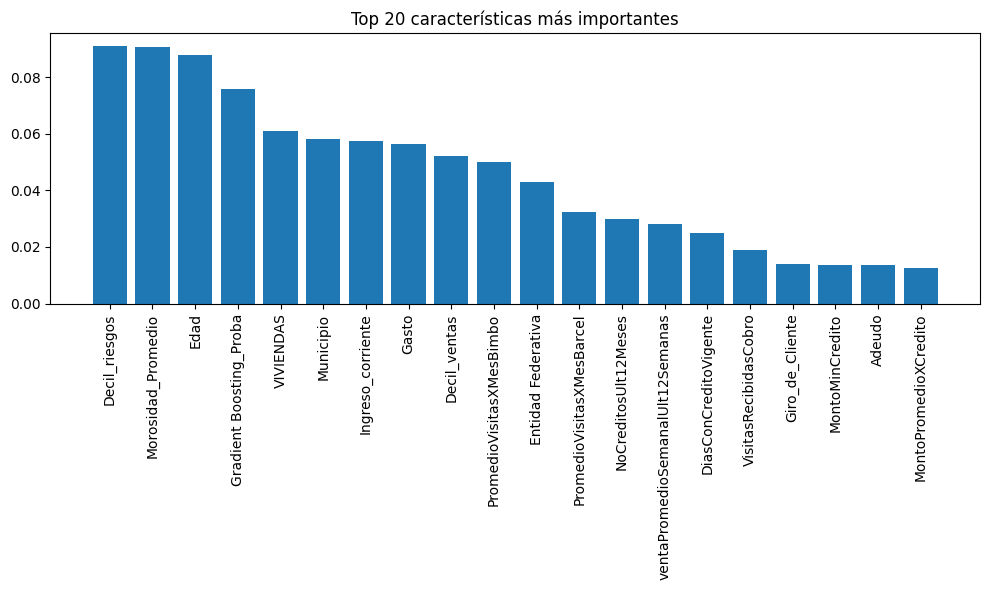

In [71]:
# Paso 1: Calcular la importancia de características usando Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_df, y_train)
importances = rf.feature_importances_

# Crear un DataFrame para visualizar la importancia de características
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Importancia de las características:")
print(feature_importances)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'][:20], feature_importances['Importance'][:20])
plt.xticks(rotation=90)
plt.title('Top 20 características más importantes')
plt.tight_layout()
plt.show()

In [33]:
# Paso 2: Eliminar características irrelevantes (importancia menor a un umbral)
threshold_importance = 0.02  # umbral
selected_features = feature_importances[feature_importances['Importance'] > threshold_importance]['Feature']
X_train_selected = X_train_df[selected_features]
X_test_selected = X_test_df[selected_features]

In [34]:
# Paso 3: Eliminar características altamente correlacionadas
# Calcular la matriz de correlación
correlation_matrix = X_train_selected.corr().abs()

# Seleccionar características que están altamente correlacionadas (> 0.9)
high_corr_var = np.where(correlation_matrix > 0.9)
high_corr_var = [(correlation_matrix.index[x], correlation_matrix.columns[y]) for x, y in zip(*high_corr_var) if x != y and x < y]

# Eliminar características redundantes
drop_columns = set([x[1] for x in high_corr_var])  # Columnas a eliminar
X_train_selected = X_train_selected.drop(columns=drop_columns)
X_test_selected = X_test_selected.drop(columns=drop_columns)

print("Características seleccionadas después de eliminar redundancia:")
print(X_train_selected.columns)

Características seleccionadas después de eliminar redundancia:
Index(['Decil_riesgos', 'Morosidad_Promedio', 'Edad',
       'Gradient Boosting_Proba', 'VIVIENDAS', 'Municipio',
       'Ingreso_corriente', 'Gasto', 'Decil_ventas',
       'PromedioVisitasXMesBimbo', 'Entidad Federativa',
       'PromedioVisitasXMesBarcel', 'NoCreditosUlt12Meses',
       'ventaPromedioSemanalUlt12Semanas', 'DiasConCreditoVigente'],
      dtype='object')


### Entrenamiento de los modelos

Se prueban 4 tipos de modelos:

- Logistc regression
- Decisión Tree
- Random forest
- XGB Gradient Boosting

In [35]:
# Modelos a probar con características seleccionadas
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}

In [36]:
# Función para calcular KS y Gini
def calculate_ks_gini(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    ks_statistic = max(tpr - fpr)
    gini = 2 * roc_auc_score(y_true, y_proba) - 1
    return ks_statistic, gini


# Entrenar y evaluar cada modelo con características seleccionadas
results = {}
roc_curves = []
for model_name, model in models.items():
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)
    y_proba = model.predict_proba(X_test_selected)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    report = classification_report(y_test, y_pred, output_dict=True)
    ks_statistic, gini = calculate_ks_gini(y_test, y_proba)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[model_name] = {'AUC': auc, 'KS': ks_statistic, 'Gini': gini,
                           'Precisión': precision,'recall':recall,'F1':f1}
    cv_scores = cross_val_score(model, X_train_selected, y_train, cv=5, scoring='roc_auc')
    results[model_name]['CV AUC'] = cv_scores.mean()
    
    # Calcular métricas
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_proba)
   
    # Calcular la estadística KS
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    ks_stat = ks_2samp(tpr, fpr).statistic
   
    roc_curves.append((fpr, tpr, auc_roc, model.__class__.__name__))
    
# Crear un dataframe con los resultados
evaluation_df = pd.DataFrame.from_dict(results, orient='index')
evaluation_df = evaluation_df[['AUC', 'KS', 'Gini','Precisión','recall','F1']]

# Mostrar los resultados
print(evaluation_df)

                          AUC        KS      Gini  Precisión    recall  \
Logistic Regression  0.706898  0.317884  0.413795   0.615297  0.483408   
Decision Tree        0.537807  0.075613  0.075613   0.447166  0.573094   
Random Forest        0.687399  0.286091  0.374798   0.593514  0.492377   
Gradient Boosting    0.702536  0.299107  0.405072   0.593057  0.551570   

                           F1  
Logistic Regression  0.541436  
Decision Tree        0.502358  
Random Forest        0.538235  
Gradient Boosting    0.571561  


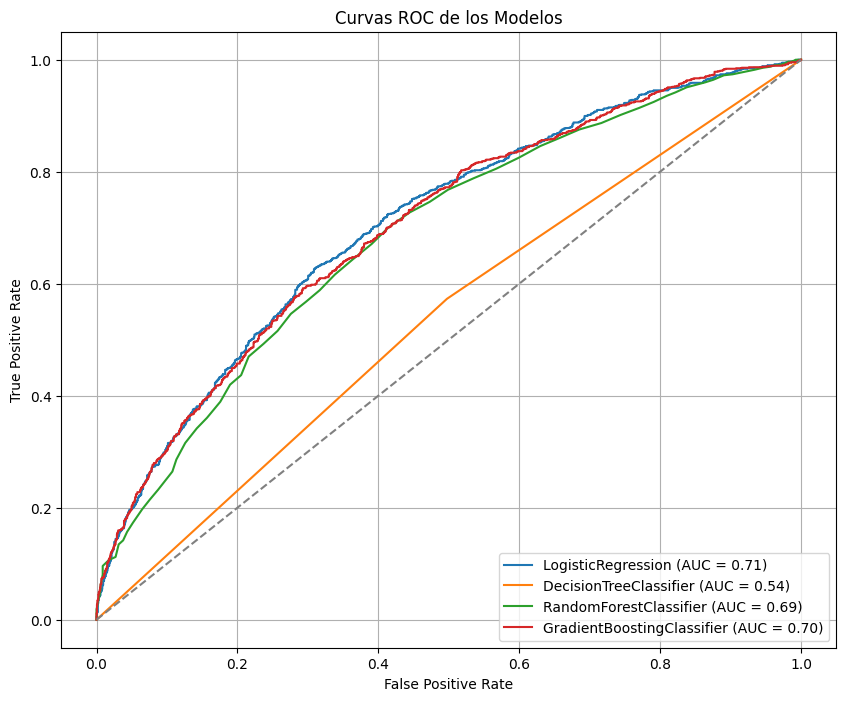

In [37]:
# Graficar las curvas ROC de cada modelo
plt.figure(figsize=(10, 8))
for fpr, tpr, auc_score, model_name in roc_curves:
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc_score:.2f})')
 
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curvas ROC de los Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Modelo seleccionado 

- Gradient Boosting

Se repite el proceso unicamente con regresión logistica, para no obviar cosas

#### Libreria y configuración

In [260]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, confusion_matrix, classification_report, 
                            roc_curve, precision_recall_curve)

# Configuración para evitar warnings
import warnings
warnings.filterwarnings('ignore')

#### Cargar data

In [261]:
# 1. Cargar el archivo de datos
file_path = r"C:\Users\mfsierra\OneDrive - fincomun.com.mx\Escritorio\Bimbo RS\Modelos ML\XGB Nuevos T-Conecta\DataEntrenamientoNuevos_3.csv"
data = pd.read_csv(file_path, encoding='latin1')

# 2. Limpieza de datos
print(f"Tamaño original de los datos: {data.shape}")
data = data.drop_duplicates(subset='No_Cliente').reset_index(drop=True)
print(f"Tamaño después de eliminar duplicados: {data.shape}")

Tamaño original de los datos: (13518, 73)
Tamaño después de eliminar duplicados: (13512, 73)


In [262]:
data['Tipo de Credito'].value_counts()

Tipo de Credito
NUEVO    13512
Name: count, dtype: int64

#### Temporalidad

In [263]:
# Convertir en fecha
data['Fecha Desembolso'] = pd.to_datetime(data['Fecha Desembolso'],format="%d/%m/%Y")

# filtrar casos despues de enero de 2024
print(f"Tamaño original de los datos: {data.shape}")
data = data[data['Fecha Desembolso'] <= '2024-01-31'].reset_index(drop = True)
print(f"Tamaño después de filtrar: {data.shape}")

# temporalidad
data['Fecha Desembolso'].describe()

Tamaño original de los datos: (13512, 73)
Tamaño después de filtrar: (11014, 73)


count                            11014
mean     2023-03-03 08:36:18.173234176
min                2022-01-20 00:00:00
25%                2022-06-03 00:00:00
50%                2023-04-17 00:00:00
75%                2023-09-28 00:00:00
max                2024-01-31 00:00:00
Name: Fecha Desembolso, dtype: object

#### Creación de variables objetivos nuevas

In [264]:
# 3. Definición de variable objetivo
data['MaloMax52'] = data['Max_Atraso_52_Semanas'].apply(lambda x: 1 if x >= 30 else 0)
data['Malo52'] = data['Max_Atraso_52_Semanas'].apply(lambda x: 1 if x >= 30 else 0)


#### Seleccion de columnas

In [265]:
# 4. Eliminar columnas innecesarias
columnas_a_eliminar = ['atraso16', 'atraso12', 'atraso8', 'atraso4', 'Malo12', 
                      'Malo8', 'Malo4', 'Region_Geografica',
                      'Max_Atraso_12_Semanas', 'Monto Desembolsado', 'Tasa_Interes Anual',
                      'Max_Atraso_8_Semanas', 'Max_Atraso_4_Semanas',
                      'MaloMax12', 'MaloMax8', 'MaloMax4', 'objetivo',
                      "'Nombre del cliente", 'BimboId', 'Max_Atraso_16_Semanas',
                      'blmId', 'Fecha Desembolso', 'Week', 'Solicitud', 'No_Cliente', 'Dias de atraso',
                      'CP', 'Tipo de Credito', 'tipoCliente', 'Morosidad_Actual', 'Max_Atraso_52_Semanas', 'Atraso52']

data = data.drop(columns=[col for col in columnas_a_eliminar if col in data.columns])
    
# 5. Renombrar columnas
data.rename(columns={
    'Malo16': 'Malo16D',
    'MaloMax16': 'Malo16M',
    'Malo52': 'Malo52D',
    'MaloMax52': 'Malo52M',
}, inplace=True)

#### Preparación de la muestra

In [266]:
# 6. Preparar datos para el modelo
X = data.copy()
X = X.drop(columns=[col for col in ['Malo16D', 'Malo16M', 'Malo52D',
                                   'Saldo_Actual', 'Saldo_Vencido', 'Frecuencia', 'Plazo', 
                                   'VentaPromedioSemanalBarcel', 'Municipio', 'Jefe_edu', 
                                   'Nivel_Socioeconómico', 'Gasto', 'Saldo_Actual_Promedio', 
                                   'Saldo_Vencido_Promedio', 'Porcentaje Pagado'] 
                    if col in X.columns])

# Guardar el BimboId para referencia
bimbo_id = X['BimboId_2'] if 'BimboId_2' in X.columns else None
if bimbo_id is not None:
    X = X.drop(columns=['BimboId_2'])
   
# Variable objetivo
y = data['Malo52M']

# Imprimir distribución de la variable objetivo
print(f"\nDistribución de la variable objetivo:")
print(y.value_counts())
print(f"Tasa de positivos: {y.mean():.2%}")


Distribución de la variable objetivo:
Malo52M
0    6221
1    4793
Name: count, dtype: int64
Tasa de positivos: 43.52%


#### Separación en numéricas y categóricas

In [267]:
# 7. Separar variables numéricas y categóricas
print("\nIdentificando tipos de variables...")
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# Eliminar columnas que no se necesitan
numerical_cols.remove('No_Credito')
numerical_cols.remove('Malo52M')

print(f"Variables numéricas ({len(numerical_cols)}): {numerical_cols[:5]}...")
print(f"Variables categóricas ({len(categorical_cols)}): {categorical_cols[:5]}...")

# Identificar columnas categóricas según su cardinalidad
cat_cols_many = [col for col in categorical_cols if X[col].nunique() > 4]
cat_cols_few = [col for col in categorical_cols if X[col].nunique() <= 4]

print(f"Variables categóricas con pocas categorías (≤4): {len(cat_cols_few)}")
print(f"Variables categóricas con muchas categorías (>4): {len(cat_cols_many)}")



Identificando tipos de variables...
Variables numéricas (13): ['Edad', 'Decil_ventas', 'Decil_riesgos', 'CreditosActivos', 'VisitasRecibidasCobro']...
Variables categóricas (12): ['Sexo', 'Entidad Federativa', 'dispositivo', 'Giro_de_Cliente', 'ventaPromedioSemanalUlt12Semanas']...
Variables categóricas con pocas categorías (≤4): 5
Variables categóricas con muchas categorías (>4): 7


#### Pipe line

In [268]:
# 8. Clase personalizada para codificación de etiquetas múltiples
class MultiColumnLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, handle_unknown='error'):
        self.encoders = None
        self.handle_unknown = handle_unknown
        
    def fit(self, X, y=None):
        # Convertir DataFrame a array para procesamiento
        if isinstance(X, pd.DataFrame):
            X_array = X.values
        else:
            X_array = X
            
        self.encoders = [LabelEncoder() for _ in range(X_array.shape[1])]
        for i, encoder in enumerate(self.encoders):
            encoder.fit(X_array[:, i])
        return self
    
    def transform(self, X):
        # Convertir DataFrame a array para procesamiento
        if isinstance(X, pd.DataFrame):
            X_array = X.values
        else:
            X_array = X
            
        X_encoded = np.zeros_like(X_array, dtype=int)
        for i, encoder in enumerate(self.encoders):
            try:
                X_encoded[:, i] = encoder.transform(X_array[:, i])
            except ValueError:
                if self.handle_unknown == 'ignore':
                    X_encoded[:, i] = -1  # Valor para categorías desconocidas
                else:
                    raise
        return X_encoded
    
    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)

# 9. Pipelines para transformación de datos
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer_onehot = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

categorical_transformer_label = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='unknown')),
    ('label', MultiColumnLabelEncoder(handle_unknown='ignore'))
])

# 10. Combinación de transformaciones
print("\nCreando pipeline de preprocesamiento...")
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat_onehot', categorical_transformer_onehot, cat_cols_few),
        ('cat_label', categorical_transformer_label, cat_cols_many)
    ], remainder='passthrough')


Creando pipeline de preprocesamiento...


#### Dividir muestra en entrenamiento y validación

In [269]:
# 11. Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

if bimbo_id is not None:
    BimboId_train = bimbo_id[X_train.index]
    BimboId_test = bimbo_id[X_test.index]

print(f"Conjunto de entrenamiento: {X_train.shape}, Positivos: {y_train.mean():.2%}")
print(f"Conjunto de prueba: {X_test.shape}, Positivos: {y_test.mean():.2%}")


Conjunto de entrenamiento: (8811, 27), Positivos: 43.51%
Conjunto de prueba: (2203, 27), Positivos: 43.53%


#### Guardar base completa

In [270]:
# Resetear indices
entrenamiento = X_train.reset_index(drop=True)
prueba = X_test.reset_index(drop=True)

# Data entrenamiento 
entrenamiento['Conjunto'] = 'Entrenamiento'

# Data ptueba
prueba['Conjunto'] = 'Prueba'

# juntar ambos data set
completa = pd.concat([entrenamiento, prueba], axis=0, ignore_index=True)

# Mostrar
completa['Conjunto']

0        Entrenamiento
1        Entrenamiento
2        Entrenamiento
3        Entrenamiento
4        Entrenamiento
             ...      
11009           Prueba
11010           Prueba
11011           Prueba
11012           Prueba
11013           Prueba
Name: Conjunto, Length: 11014, dtype: object

In [271]:
# Eliminar columnas innecesarias
del X_train['No_Credito']
del X_test['No_Credito']
del X_train['Malo52M']
del X_test['Malo52M']


#### Aplicar pip line al entrenamiento y la validación

In [272]:
# 12. Aplicar preprocesamiento
print("Aplicando preprocesamiento a los datos...")
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

Aplicando preprocesamiento a los datos...


#### Selección de características relevantes

Criterios

- Correlación de variables (pearson)
- Importancia de carcterísticas (Random Forest)


Realizando selección de características relevantes...
Total de características con nombres identificados: 33
Nombres de algunas características: ['Edad', 'Decil_ventas', 'Decil_riesgos', 'CreditosActivos', 'VisitasRecibidasCobro']
Matriz preprocesada convertida a DataFrame con 33 columnas
Calculando importancia de características con Random Forest...


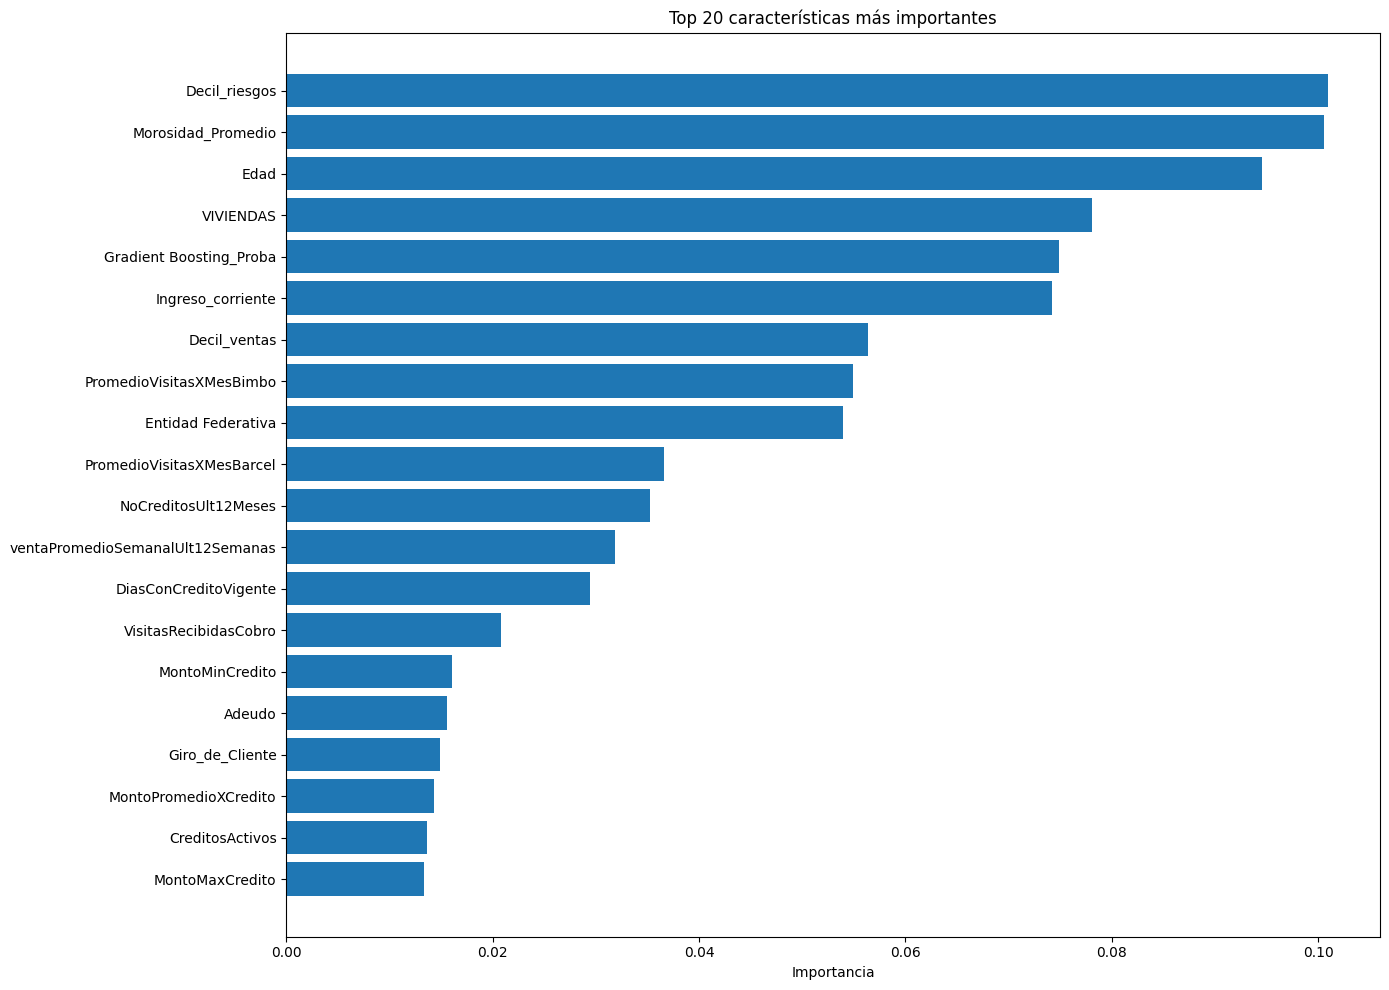


Top 10 características más importantes:
1. Decil_riesgos: 0.1010
2. Morosidad_Promedio: 0.1005
3. Edad: 0.0945
4. VIVIENDAS: 0.0781
5. Gradient Boosting_Proba: 0.0748
6. Ingreso_corriente: 0.0742
7. Decil_ventas: 0.0564
8. PromedioVisitasXMesBimbo: 0.0549
9. Entidad Federativa: 0.0540
10. PromedioVisitasXMesBarcel: 0.0366

Eliminando características con importancia < 0.01...
Características seleccionadas: 22 de 33
Identificando y eliminando características altamente correlacionadas...


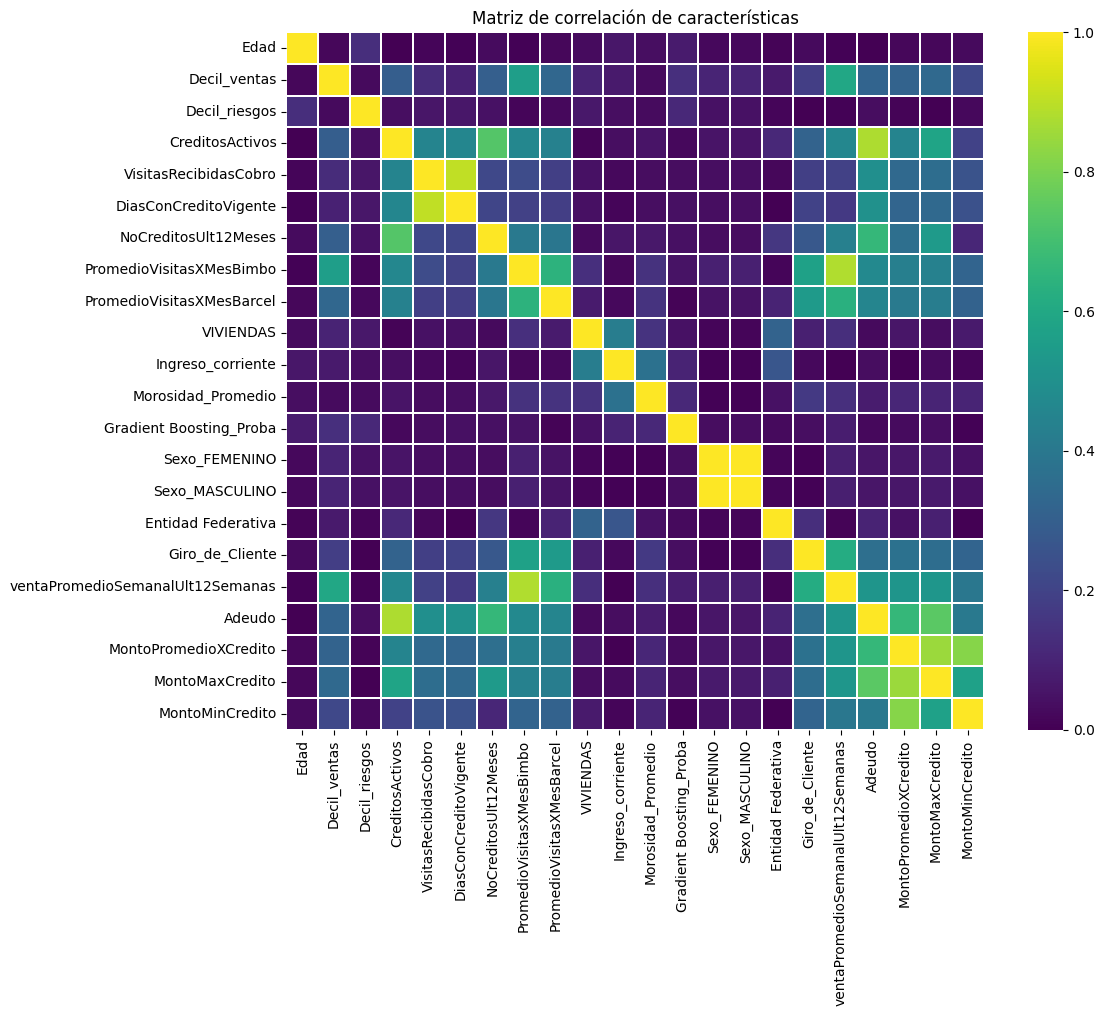

Características altamente correlacionadas (>0.9): 2
Eliminando características redundantes: ['DiasConCreditoVigente', 'Sexo_MASCULINO']...
Dimensiones finales: (8811, 20)
Conjunto de entrenamiento final: (8811, 20)
Conjunto de prueba final: (2203, 20)


In [273]:
# 13. Selección de características relevantes usando Random Forest
print("\nRealizando selección de características relevantes...")
# 13.1 Obtener nombres de características después del preprocesamiento
try:
    all_feature_names = []
    
    # Características numéricas
    if len(numerical_cols) > 0:
        all_feature_names.extend(numerical_cols)
    
    # Características categóricas con one-hot encoding
    if len(cat_cols_few) > 0:
        try:
            onehot_features = preprocessor.named_transformers_['cat_onehot'].named_steps['onehot'].get_feature_names_out(cat_cols_few)
            all_feature_names.extend(onehot_features)
        except:
            # Fallback para versiones anteriores de sklearn
            for col in cat_cols_few:
                unique_vals = X[col].dropna().unique()
                all_feature_names.extend([f"{col}_{val}" for val in unique_vals])
    
    # Características categóricas con label encoding
    if len(cat_cols_many) > 0:
        all_feature_names.extend(cat_cols_many)
    
    print(f"Total de características con nombres identificados: {len(all_feature_names)}")
    
    # Verificar si los nombres de características coinciden con la dimensionalidad de los datos preprocesados
    if len(all_feature_names) != X_train_prepared.shape[1]:
        print(f"Advertencia: Número de nombres de características ({len(all_feature_names)}) no coincide con la dimensionalidad de los datos ({X_train_prepared.shape[1]})")
        # Crear nombres genéricos para todas las características
        all_feature_names = [f"{col}" if i < len(all_feature_names) else f"feature_{i}" 
                             for i, col in enumerate(all_feature_names + [f"feature_{j}" for j in range(X_train_prepared.shape[1])])]
        all_feature_names = all_feature_names[:X_train_prepared.shape[1]]
    
    print(f"Nombres de algunas características: {all_feature_names[:5]}")
    
    # Convertir matriz a DataFrame con nombres reales
    if isinstance(X_train_prepared, np.ndarray):
        X_train_df = pd.DataFrame(X_train_prepared, columns=all_feature_names[:X_train_prepared.shape[1]])
        X_test_df = pd.DataFrame(X_test_prepared, columns=all_feature_names[:X_test_prepared.shape[1]])
    else:
        # Si es matriz sparse, convertir a array denso
        X_train_df = pd.DataFrame(X_train_prepared.toarray(), columns=all_feature_names[:X_train_prepared.shape[1]])
        X_test_df = pd.DataFrame(X_test_prepared.toarray(), columns=all_feature_names[:X_test_prepared.shape[1]])
    
    print(f"Matriz preprocesada convertida a DataFrame con {X_train_df.shape[1]} columnas")
    
    # 13.2 Calcular importancia de características usando Random Forest
    print("Calculando importancia de características con Random Forest...")
    rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
    rf.fit(X_train_df, y_train)
    importances = rf.feature_importances_
    
    # Crear DataFrame para visualizar importancia con nombres reales
    feature_importances_df = pd.DataFrame({'Feature': all_feature_names[:len(importances)], 'Importance': importances})
    feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
    
    # Visualizar top 20 características con nombres reales
    plt.figure(figsize=(14, 10))
    plt.barh(range(min(20, len(feature_importances_df))), 
             feature_importances_df['Importance'][:20], align='center')
    plt.yticks(range(min(20, len(feature_importances_df))), 
               feature_importances_df['Feature'][:20])
    plt.xlabel('Importancia')
    plt.title('Top 20 características más importantes')
    plt.gca().invert_yaxis()  # Para que la característica más importante esté arriba
    plt.tight_layout()
    plt.show()
    
    # Mostrar tabla con importancias
    print("\nTop 10 características más importantes:")
    for i, (feature, importance) in enumerate(zip(feature_importances_df['Feature'][:10], 
                                                feature_importances_df['Importance'][:10])):
        print(f"{i+1}. {feature}: {importance:.4f}")
    
    # 13.3 Eliminar características irrelevantes
    threshold_importance = 0.01  # Umbral de importancia, ajustar según necesidad
    print(f"\nEliminando características con importancia < {threshold_importance}...")
    selected_features = feature_importances_df[feature_importances_df['Importance'] > threshold_importance]['Feature']
    print(f"Características seleccionadas: {len(selected_features)} de {len(feature_importances_df)}")
    
    # Filtrar matrices de características usando nombres reales
    selected_indices = [i for i, feat in enumerate(all_feature_names) if feat in selected_features.values]
    X_train_selected = X_train_df.iloc[:, selected_indices]
    X_test_selected = X_test_df.iloc[:, selected_indices]
    
    # 13.4 Eliminar características altamente correlacionadas
    print("Identificando y eliminando características altamente correlacionadas...")
    # Calcular matriz de correlación
    correlation_matrix = X_train_selected.corr().abs()
    
    # Visualizar mapa de calor de correlaciones
    plt.figure(figsize=(12, 10))
    sns.heatmap(correlation_matrix, cmap='viridis', vmax=1.0, vmin=0.0, 
                linewidths=0.1, square=True, annot=False)
    plt.title('Matriz de correlación de características')
    plt.tight_layout()
    plt.show()
    
    # Seleccionar características que están altamente correlacionadas (> 0.9)
    upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
    high_corr_threshold = 0.9
    high_corr_features = [column for column in upper.columns if any(upper[column] > high_corr_threshold)]
    
    print(f"Características altamente correlacionadas (>{high_corr_threshold}): {len(high_corr_features)}")
    if len(high_corr_features) > 0:
        print(f"Eliminando características redundantes: {high_corr_features[:5]}...")
        X_train_final = X_train_selected.drop(columns=high_corr_features)
        X_test_final = X_test_selected.drop(columns=high_corr_features)
        print(f"Dimensiones finales: {X_train_final.shape}")
    else:
        X_train_final = X_train_selected
        X_test_final = X_test_selected
        print("No se encontraron características altamente correlacionadas para eliminar")
    
    # Convertir de nuevo a arrays para el modelo
    X_train_prepared = X_train_final.values
    X_test_prepared = X_test_final.values
    
    print(f"Conjunto de entrenamiento final: {X_train_prepared.shape}")
    print(f"Conjunto de prueba final: {X_test_prepared.shape}")

except Exception as e:
    print(f"Error en el proceso de selección de características: {str(e)}")
    print("Continuando con todas las características originales...")

#### Entrenar modelo

In [309]:
# 13.5 Crear y entrenar un GradientBoostingClassifier con parámetros optimizados para reducir sobreajuste
print("\nEntrenando modelo GradientBoostingClassifier optimizado para reducir sobreajuste...")
gb_clf = GradientBoostingClassifier(
    n_estimators=150,           # Balanceando entre aprendizaje y generalización
    learning_rate=0.03,         # Reducido para permitir un aprendizaje más gradual
    max_depth=3,                # Mantenido bajo para evitar árboles demasiado específicos
    min_samples_split=15,       # Aumentado para requerir más muestras en cada división
    min_samples_leaf=10,        # Añadido para asegurar suficientes muestras en nodos hoja
    subsample=0.8,              # Añadido para usar solo 80% de muestras en cada árbol
    max_features=0.7,           # Añadido para considerar solo 70% de características en cada división
    random_state=42
)

# Entrenamiento
print("Entrenando modelo...")
gb_clf.fit(X_train_prepared, y_train)


Entrenando modelo GradientBoostingClassifier optimizado para reducir sobreajuste...
Entrenando modelo...


GradientBoostingClassifier(learning_rate=0.03, max_features=0.7,
                           min_samples_leaf=10, min_samples_split=15,
                           n_estimators=150, random_state=42, subsample=0.8)

In [315]:
X_train_prepared.shape

(8811, 20)

#### Evaluación del modelo


Evaluación del modelo básico:
Accuracy: 0.6623
Precision: 0.6373
Recall: 0.5203
F1 Score: 0.5729
ROC AUC Score: 0.7113


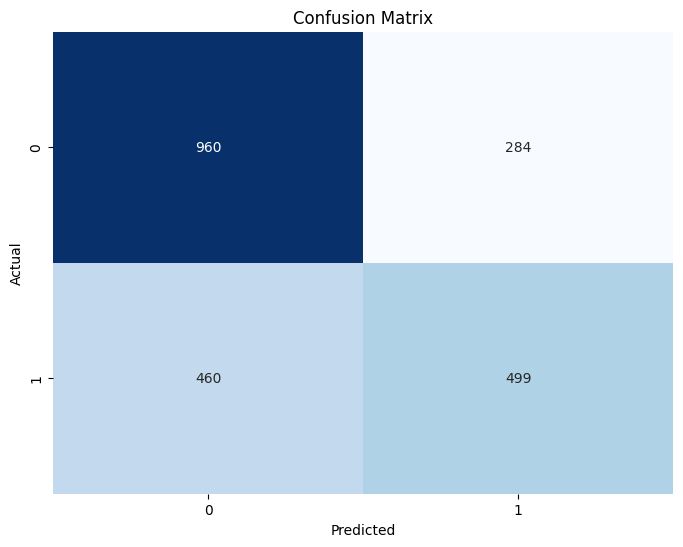


Reporte de clasificación:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      1244
           1       0.64      0.52      0.57       959

    accuracy                           0.66      2203
   macro avg       0.66      0.65      0.65      2203
weighted avg       0.66      0.66      0.66      2203



In [310]:
# 14. Evaluar el modelo básico
y_pred = gb_clf.predict(X_test_prepared)
y_prob = gb_clf.predict_proba(X_test_prepared)[:, 1]

print("\nEvaluación del modelo básico:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob):.4f}")

# 15. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))

In [311]:
# Función para calcular KS y Gini
def calculate_ks_gini(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    ks_statistic = max(tpr - fpr)
    gini = 2 * roc_auc_score(y_true, y_proba) - 1
    return ks_statistic, gini

# Calcular métricas 
auc = roc_auc_score(y_test, y_prob)
report = classification_report(y_test, y_pred, output_dict=True)
ks_statistic, gini = calculate_ks_gini(y_test, y_prob)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
results = {'AUC': auc, 'KS': ks_statistic, 'Gini': gini,
                    'Precisión': precision,'recall':recall,'F1':f1}
cv_scores = cross_val_score(gb_clf, X_train_prepared, y_train, cv=5, scoring='roc_auc')
results['CV AUC'] = cv_scores.mean()
results

{'AUC': 0.7113012114038941,
 'KS': 0.3079239159226016,
 'Gini': 0.42260242280778826,
 'Precisión': 0.6372924648786717,
 'recall': 0.5203336809176226,
 'F1': 0.5729047072330654,
 'CV AUC': 0.7215150626279101}

#### Resumen de métricas de evaluación
#### Análisis de métricas del modelo

En términos generales, estos valores apuntan a un desempeño similar al anterior, con algunas pequeñas variaciones. Veamos cada métrica:

1. **AUC = 0.7113**
   - El AUC (Área Bajo la Curva ROC) mide la habilidad de separar clases positivas y negativas.
   - Con un rango entre 0.5 (modelo aleatorio) y 1.0 (modelo perfecto), un valor de 0.71 refleja una capacidad de discriminación moderada.

2. **KS = 0.3079**
   - La estadística KS (Kolmogorov-Smirnov) también mide la separación entre las distribuciones de la clase positiva y la negativa.
   - Un valor de 0.3079 se suele considerar aceptable en muchas aplicaciones. Indica que el modelo discrimina en un nivel consistente con el AUC.

3. **Gini = 0.4226**
   - Está relacionado con el AUC por la fórmula \(\text{Gini} = 2 \times \text{AUC} - 1\).
   - Un 0.4226 encaja con un AUC de aproximadamente 0.71 y, de igual modo, sugiere una separación moderada.

4. **Precisión (Accuracy) = 0.6373**
   - Asumiendo que “Precisión” se refiere a la *Exactitud* (o *Accuracy*), indica que el 63.7% de las predicciones son correctas.
   - Esto depende mucho de la distribución de clases; en conjuntos balanceados, podría considerarse razonable, pero todo depende del dominio y el costo de los errores.

5. **Recall = 0.5203**
   - El *Recall* (sensibilidad) mide qué proporción de los positivos reales es identificada como tal.
   - Con un 0.52, el modelo está encontrando cerca de la mitad de los casos positivos.

6. **F1 = 0.5729**
   - El F1 es la media armónica entre *Precision* (en inglés) y *Recall*.
   - Un valor de 0.57 sugiere un balance moderado entre capturar positivos y no equivocarse con los negativos.

7. **CV AUC = 0.7215**
   - Este es el promedio de AUC obtenido a través de validación cruzada.
   - Es ligeramente superior al AUC en el conjunto de evaluación (0.7113), lo que sugiere una consistencia adecuada y que el modelo no está sobreajustado de forma severa.

---

### Conclusiones y recomendaciones generales

- El modelo presenta una **discriminación moderada**: ni muy baja ni extraordinariamente alta.
- Si el objetivo es **detectar la mayor cantidad de positivos** (maximizar *recall*), convendría:
  - Ajustar los umbrales de decisión (threshold tuning).
  - Evaluar técnicas de sobremuestreo (oversampling) o submuestreo (undersampling), si existe desbalance.
  - Ajustar hiperparámetros o probar otros algoritmos con mayor énfasis en la sensibilidad.
- Si, por el contrario, quieres **reducir falsos positivos**, deberías enfocarte en mejorar la *precision* (en inglés):
  - Ajustar el umbral para ser más estricto al clasificar positivos.
  - Investigar nuevas características o transformaciones que ayuden a diferenciar mejor los negativos.
- Para un **equilibrio global** más alto, busca **nuevas fuentes de datos**, mejora la ingeniería de características o profundiza en la optimización de hiperparámetros para incrementar tanto F1 como AUC.



#### Sobre Ajuste

In [312]:
# Calcular métricas en conjunto de entrenamiento
y_pred_train = gb_clf.predict(X_train_prepared)
y_prob_train = gb_clf.predict_proba(X_train_prepared)[:, 1]

# Métricas de entrenamiento
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

train_accuracy = accuracy_score(y_train, y_pred_train)
train_precision = precision_score(y_train, y_pred_train)
train_recall = recall_score(y_train, y_pred_train)
train_f1 = f1_score(y_train, y_pred_train)
train_auc = roc_auc_score(y_train, y_prob_train)

# Métricas de prueba 
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)
test_auc = roc_auc_score(y_test, y_prob)

# Comparación
print("Comparación de métricas entrenamiento vs prueba:")
print(f"Accuracy: Entrenamiento {train_accuracy:.4f}, Prueba {test_accuracy:.4f}, Diferencia {train_accuracy - test_accuracy:.4f}")
print(f"Precision: Entrenamiento {train_precision:.4f}, Prueba {test_precision:.4f}, Diferencia {train_precision - test_precision:.4f}")
print(f"Recall: Entrenamiento {train_recall:.4f}, Prueba {test_recall:.4f}, Diferencia {train_recall - test_recall:.4f}")
print(f"F1: Entrenamiento {train_f1:.4f}, Prueba {test_f1:.4f}, Diferencia {train_f1 - test_f1:.4f}")
print(f"AUC: Entrenamiento {train_auc:.4f}, Prueba {test_auc:.4f}, Diferencia {train_auc - test_auc:.4f}")

Comparación de métricas entrenamiento vs prueba:
Accuracy: Entrenamiento 0.6849, Prueba 0.6623, Diferencia 0.0227
Precision: Entrenamiento 0.6761, Prueba 0.6373, Diferencia 0.0388
Recall: Entrenamiento 0.5297, Prueba 0.5203, Diferencia 0.0094
F1: Entrenamiento 0.5940, Prueba 0.5729, Diferencia 0.0211
AUC: Entrenamiento 0.7501, Prueba 0.7113, Diferencia 0.0388


In [313]:
# Función para calcular KS
def calculate_ks(y_true, y_prob):
    # Separar probabilidades para clases positivas y negativas
    prob_pos = y_prob[y_true == 1]
    prob_neg = y_prob[y_true == 0]
    
    # Calcular KS usando la función de scipy
    ks_statistic, _ = stats.ks_2samp(prob_pos, prob_neg)
    return ks_statistic

# Función para calcular Gini
def calculate_gini(y_true, y_prob):
    # Gini es 2*AUC-1
    auc = roc_auc_score(y_true, y_prob)
    return 2 * auc - 1

# Calcular todas las métricas para entrenamiento
train_ks = calculate_ks(y_train, y_prob_train)
train_gini = calculate_gini(y_train, y_prob_train)

# Calcular todas las métricas para prueba
test_ks = calculate_ks(y_test, y_prob)
test_gini = calculate_gini(y_test, y_prob)

# Añadir a la comparación
print(f"KS: Entrenamiento {train_ks:.4f}, Prueba {test_ks:.4f}, Diferencia {train_ks - test_ks:.4f}")
print(f"Gini: Entrenamiento {train_gini:.4f}, Prueba {test_gini:.4f}, Diferencia {train_gini - test_gini:.4f}")

KS: Entrenamiento 0.3702, Prueba 0.3079, Diferencia 0.0622
Gini: Entrenamiento 0.5001, Prueba 0.4226, Diferencia 0.0775


### Data set completo con resultados sin calibrar

In [303]:
# Primero, calculamos las predicciones y probabilidades para el conjunto de entrenamiento también
y_pred_train = gb_clf.predict(X_train_prepared)
y_prob_train = gb_clf.predict_proba(X_train_prepared)[:, 1]

# Añadir predicciones y probabilidades a los dataframes antes de concatenarlos
entrenamiento['Malo52M_Pred'] = y_pred_train
entrenamiento['Malo52M_Prob'] = y_prob_train

prueba['Malo52M_Pred'] = y_pred
prueba['Malo52M_Prob'] = y_prob

# Ya tenías el código para juntar ambos datasets
completa = pd.concat([entrenamiento, prueba], axis=0, ignore_index=True)

# Calcular errores (asumiendo que tienes una columna 'Malo52M' con valores reales)
if 'Malo52M' in completa.columns:
    completa['Error'] = completa['Malo52M'] != completa['Malo52M_Pred']
    completa['Tipo_Error'] = 'Correcto'
    completa.loc[(completa['Malo52M'] == 1) & (completa['Malo52M_Pred'] == 0), 'Tipo_Error'] = 'Falso Negativo'
    completa.loc[(completa['Malo52M'] == 0) & (completa['Malo52M_Pred'] == 1), 'Tipo_Error'] = 'Falso Positivo'

# Exportar resultados
completa.to_csv("resultados_modelo_completo.csv", index=False)

# Análisis por deciles
completa['Decil'] = pd.qcut(completa['Malo52M_Prob'], 10, labels=False)
deciles_analysis = completa.groupby('Decil').agg(
    Total=('Malo52M', 'count'),
    Positivos=('Malo52M', 'sum'),
    Tasa_Positivos=('Malo52M', 'mean'),
    Prob_Min=('Malo52M_Prob', 'min'),
    Prob_Max=('Malo52M_Prob', 'max'),
    Prob_Media=('Malo52M_Prob', 'mean')
).reset_index()

print("\nAnálisis por deciles de probabilidad:")
print(deciles_analysis)


Análisis por deciles de probabilidad:
   Decil  Total  Positivos  Tasa_Positivos  Prob_Min  Prob_Max  Prob_Media
0      0   1102        113        0.102541  0.093380  0.209547    0.163295
1      1   1101        222        0.201635  0.209612  0.280722    0.248043
2      2   1101        323        0.293370  0.280791  0.329487    0.305569
3      3   1102        354        0.321234  0.329555  0.377638    0.353685
4      4   1101        426        0.386921  0.377704  0.422638    0.400173
5      5   1101        505        0.458674  0.422644  0.468053    0.444430
6      6   1102        569        0.516334  0.468055  0.528528    0.496392
7      7   1101        649        0.589464  0.528609  0.598125    0.563235
8      8   1101        735        0.667575  0.598144  0.671663    0.633457
9      9   1102        897        0.813975  0.671665  0.880261    0.753967


#### Optimización de hiperparámetros

In [290]:
# 16. Optimización de hiperparámetros
print("\nIniciando optimización de hiperparámetros (puede tardar varios minutos)...")
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5],
    'subsample': [0.8, 1.0]
}

# Usar StratifiedKFold para mantener la distribución de clases
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid,
    cv=cv,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_prepared, y_train)

# 17. Mostrar resultados de la optimización
print("\nMejores parámetros encontrados:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")
print(f"Mejor puntuación ROC AUC: {grid_search.best_score_:.4f}")


Iniciando optimización de hiperparámetros (puede tardar varios minutos)...
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Mejores parámetros encontrados:
learning_rate: 0.1
max_depth: 3
min_samples_split: 5
n_estimators: 100
subsample: 0.8
Mejor puntuación ROC AUC: 0.7244


#### Evaluar el modelo optimizado


Evaluación del modelo optimizado:
Accuracy: 0.6636
Precision: 0.6329
Recall: 0.5412
F1 Score: 0.5835
ROC AUC Score: 0.7141


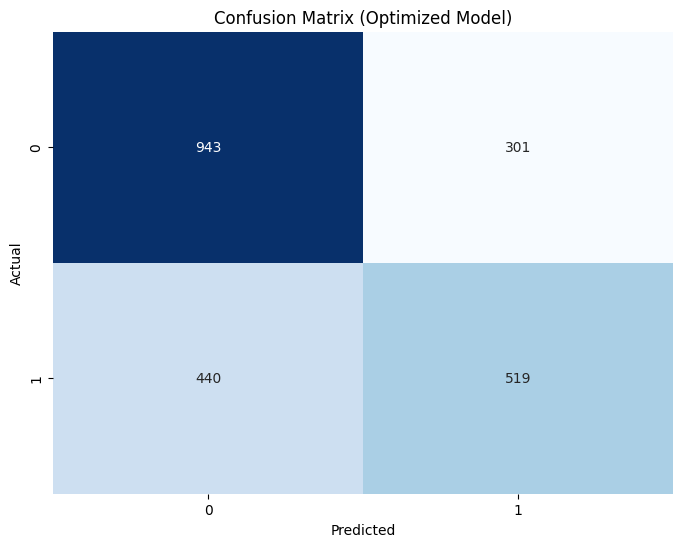


Reporte de clasificación del modelo optimizado:
              precision    recall  f1-score   support

           0       0.68      0.76      0.72      1244
           1       0.63      0.54      0.58       959

    accuracy                           0.66      2203
   macro avg       0.66      0.65      0.65      2203
weighted avg       0.66      0.66      0.66      2203


Realizando validación cruzada del modelo final...
Puntuaciones de validación cruzada (ROC AUC): [0.74118646 0.72685449 0.71822454 0.73352174 0.71113915]
Media de validación cruzada: 0.7262
Desviación estándar: 0.0107


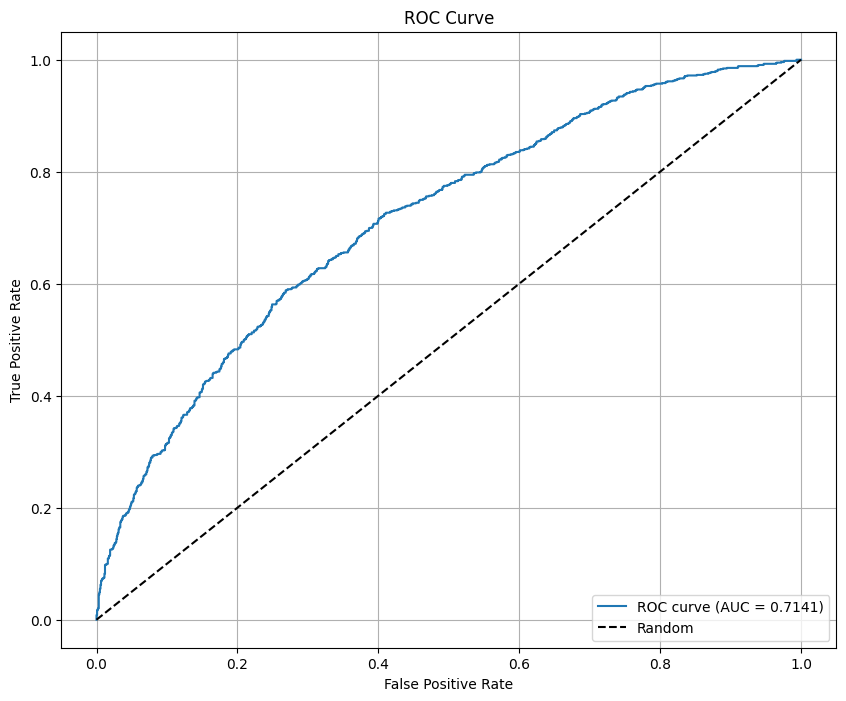

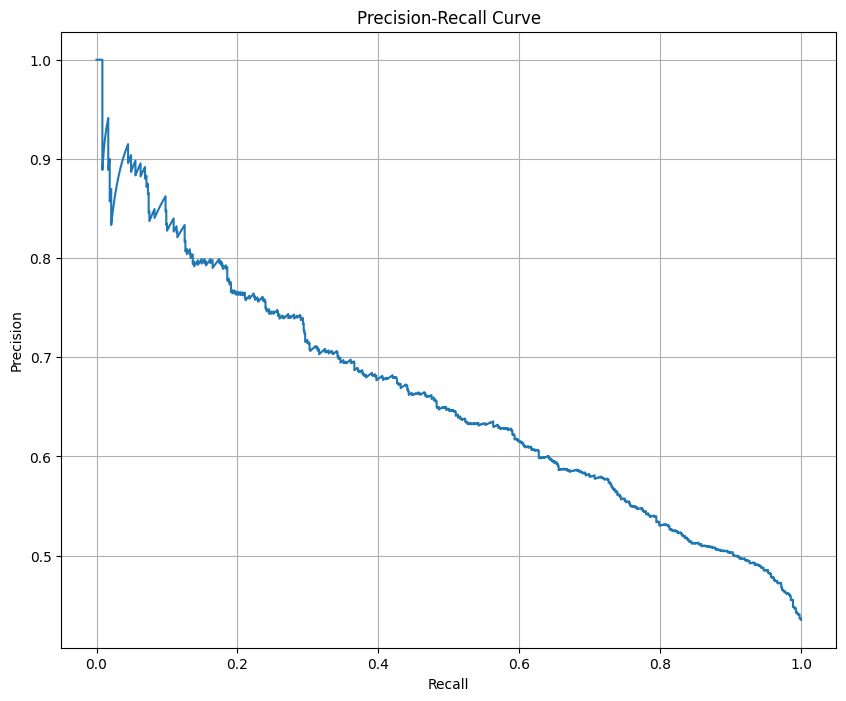

In [291]:
# 18. Evaluar el modelo optimizado
best_gb_clf = grid_search.best_estimator_
y_pred_best = best_gb_clf.predict(X_test_prepared)
y_prob_best = best_gb_clf.predict_proba(X_test_prepared)[:, 1]

print("\nEvaluación del modelo optimizado:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")
print(f"ROC AUC Score: {roc_auc_score(y_test, y_prob_best):.4f}")

# 19. Matriz de confusión del modelo optimizado
cm_best = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Optimized Model)')
plt.show()

print("\nReporte de clasificación del modelo optimizado:")
print(classification_report(y_test, y_pred_best))

# 20. Validación cruzada del modelo final
print("\nRealizando validación cruzada del modelo final...")
cv_scores = cross_val_score(
    best_gb_clf, 
    preprocessor.transform(X), 
    y, 
    cv=cv, 
    scoring='roc_auc'
)

print(f"Puntuaciones de validación cruzada (ROC AUC): {cv_scores}")
print(f"Media de validación cruzada: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")

# 21. Curva ROC
plt.figure(figsize=(10, 8))
fpr, tpr, _ = roc_curve(y_test, y_prob_best)
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y_test, y_prob_best):.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

# 22. Curva Precision-Recall
plt.figure(figsize=(10, 8))
precision, recall, _ = precision_recall_curve(y_test, y_prob_best)
plt.plot(recall, precision, label=f'Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()


#### Importancia de características modelo final

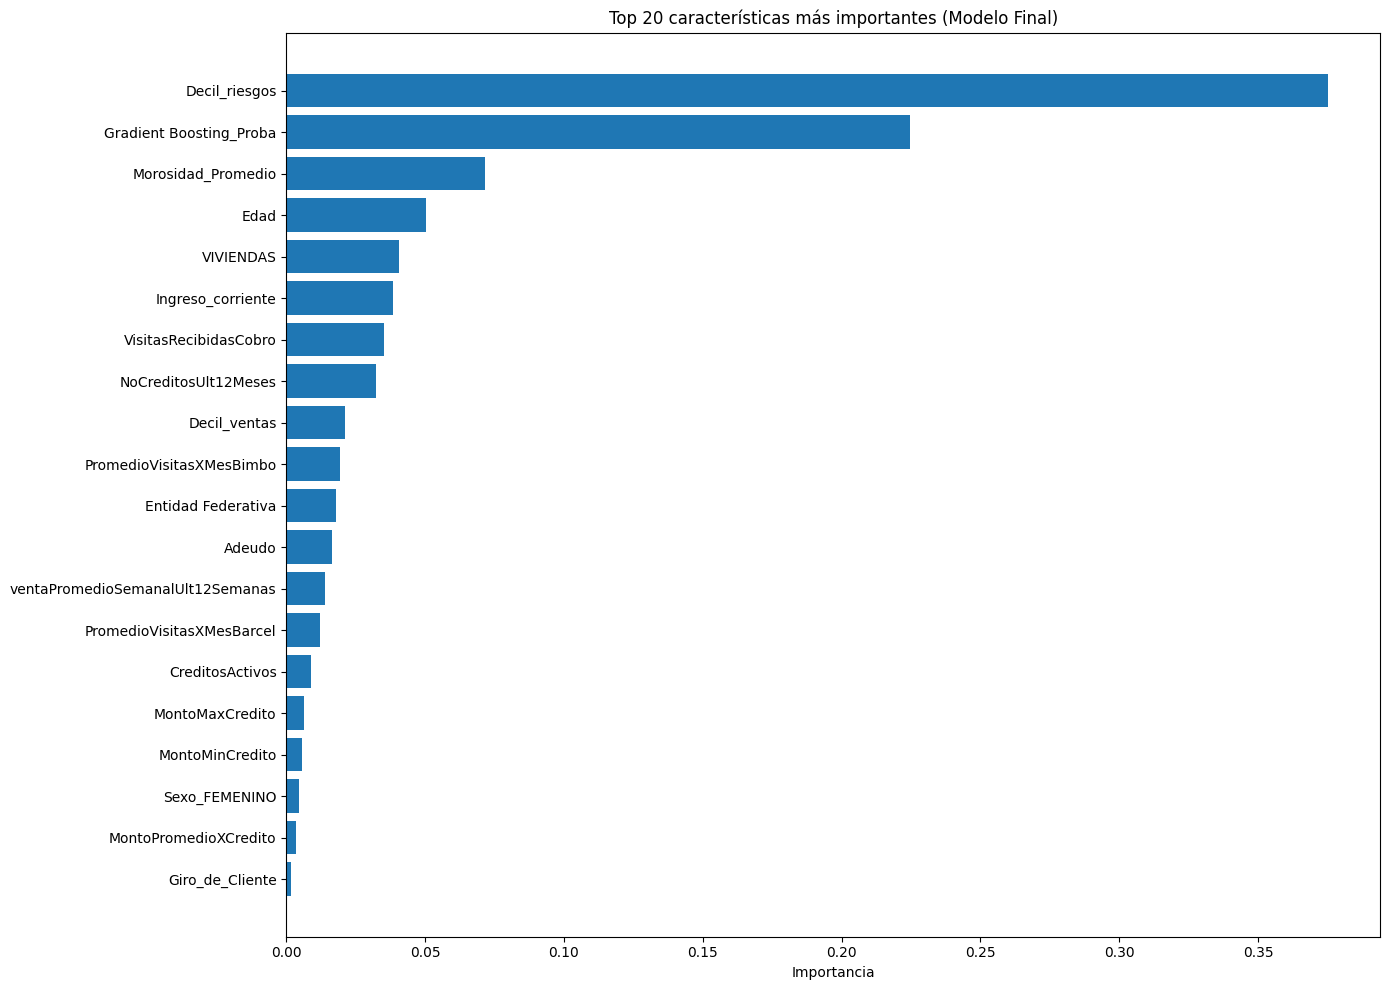


Top 10 características más importantes en el modelo final:
1. Decil_riesgos: 0.3752
2. Gradient Boosting_Proba: 0.2247
3. Morosidad_Promedio: 0.0715
4. Edad: 0.0504
5. VIVIENDAS: 0.0405
6. Ingreso_corriente: 0.0386
7. VisitasRecibidasCobro: 0.0353
8. NoCreditosUlt12Meses: 0.0323
9. Decil_ventas: 0.0210
10. PromedioVisitasXMesBimbo: 0.0193

Modelo de GradientBoostingClassifier optimizado y evaluado correctamente.


In [292]:
# 23. Importancia de características del modelo final
if hasattr(best_gb_clf, 'feature_importances_'):
    # Obtener importancias del modelo final
    feature_importances = best_gb_clf.feature_importances_
    
    # Crear DataFrame con nombres reales (si están disponibles)
    try:
        if 'all_feature_names' in locals() and len(all_feature_names) == len(feature_importances):
            feat_names = all_feature_names
        else:
            # Usar los nombres de características de X_train_final si está definido
            if 'X_train_final' in locals():
                feat_names = X_train_final.columns.tolist()
            else:
                feat_names = [f"feature_{i}" for i in range(len(feature_importances))]
                
        # Crear DataFrame de importancias
        importances_df = pd.DataFrame({
            'Feature': feat_names,
            'Importance': feature_importances
        }).sort_values('Importance', ascending=False)
        
        # Visualizar top 20 características
        plt.figure(figsize=(14, 10))
        plt.barh(range(min(20, len(importances_df))), 
                importances_df['Importance'][:20], align='center')
        plt.yticks(range(min(20, len(importances_df))), 
                importances_df['Feature'][:20])
        plt.xlabel('Importancia')
        plt.title('Top 20 características más importantes (Modelo Final)')
        plt.gca().invert_yaxis()  # Para que la característica más importante esté arriba
        plt.tight_layout()
        plt.show()
        
        # Mostrar tabla con importancias
        print("\nTop 10 características más importantes en el modelo final:")
        for i, (feature, importance) in enumerate(zip(importances_df['Feature'][:10], 
                                                    importances_df['Importance'][:10])):
            print(f"{i+1}. {feature}: {importance:.4f}")
    
    except Exception as e:
        # Si hay algún error, mostrar la visualización básica
        print(f"Error al crear visualización de características con nombres reales: {str(e)}")
        indices = np.argsort(feature_importances)[::-1]
        
        plt.figure(figsize=(12, 8))
        plt.title('Top 20 características más importantes (Modelo Final)')
        plt.bar(range(min(20, len(feature_importances))), feature_importances[indices][:20])
        plt.xticks(range(min(20, len(feature_importances))), range(min(20, len(feature_importances))))
        plt.xlabel('Índice de característica')
        plt.ylabel('Importancia')
        plt.tight_layout()
        plt.show()

print("\nModelo de GradientBoostingClassifier optimizado y evaluado correctamente.")

In [293]:
# Función para calcular KS y Gini
def calculate_ks_gini(y_true, y_proba):
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    ks_statistic = max(tpr - fpr)
    gini = 2 * roc_auc_score(y_true, y_proba) - 1
    return ks_statistic, gini

# Calcular métricas 
auc = roc_auc_score(y_test, y_prob_best)
report = classification_report(y_test, y_pred_best, output_dict=True)
ks_statistic, gini = calculate_ks_gini(y_test, y_prob_best)
precision = precision_score(y_test, y_pred_best)
recall = recall_score(y_test, y_pred_best)
f1 = f1_score(y_test, y_pred_best)
results = {'AUC': auc, 'KS': ks_statistic, 'Gini': gini,
                    'Precisión': precision,'recall':recall,'F1':f1}
cv_scores = cross_val_score(gb_clf, X_train_prepared, y_train, cv=5, scoring='roc_auc')
results['CV AUC'] = cv_scores.mean()
results

{'AUC': 0.7141469879194899,
 'KS': 0.3196238713289902,
 'Gini': 0.4282939758389799,
 'Precisión': 0.6329268292682927,
 'recall': 0.5411887382690302,
 'F1': 0.5834738617200674,
 'CV AUC': 0.7178926164691749}

#### Exportar modelo 

In [142]:
# 24. Guardar el modelo y el preprocesador 
import joblib

# Guardar el modelo optimizado
joblib.dump(best_gb_clf, 'mejor_modelo_gb.pkl')
# Guardar el preprocesador
joblib.dump(preprocessor, 'preprocesador.pkl')

print("\nModelo y preprocesador guardados como 'mejor_modelo_gb.pkl' y 'preprocesador.pkl'")


Modelo y preprocesador guardados como 'mejor_modelo_gb.pkl' y 'preprocesador.pkl'
